In [13]:
import numpy as np
import matplotlib.pyplot as plt

In [14]:
class Plane:
    def __init__(self,_id,_current_pos,_current_vel,_pos_array,_vel_array):
        self.id = _id #Unique id of plane
        #Think remove the initial pos
        self.pos_current = _current_pos #Pos at current time
        self.vel_current = _current_vel #Vel at current time
        self.pos_array = _pos_array #Array of position over time
        self.vel_array = _vel_array #Array of velocity over time

    def __str__(self):
        #For useful output whenprinting object e.g. print(plane) = ID: 10, Pos: [0,1,2] etc.
        #Probably needs bit of adjusting
        return "ID: {id}, Current_pos: {c_pos}, Current_vel: {c_vel}".format(id = self.id, c_pos = self.pos_current, c_vel = self.vel_current)

In [15]:
def create_n_planes(n_planes,max_pos,max_vel,num_time_steps):
    # n_planes controls how many planes are created
    # max_pos is used as size of the grid planes put randomly in (just temp)
    # max_vel scales the maximum velocity of the planes

    plane_list = []
    for id in range(n_planes):
        # initial_pos = np.random.rand(3) * max_pos
        # initial_vel = np.random.rand(3) * max_vel

        pos_array = np.zeros((num_time_steps,3))
        vel_array = np.zeros((num_time_steps,3))

        pos_array[0,:] = np.random.rand(3) * max_pos
        vel_array[0,:] = np.random.rand(3) * max_vel

        plane_list.append(Plane(id, #Unique id
                                pos_array[0,:], #Inital pos
                                vel_array[0,:], #Initial vel
                                pos_array, #Pos array
                                vel_array)) #Vel array
    
    return plane_list

In [16]:
#Define time setup
max_t = 10
delta_t = 0.5
num_t_steps = int(max_t / delta_t)

#Define variables about planes
num_planes = 10
grid_size = 10 #10x10 grid
max_plane_vel = 1

In [17]:
#Create planes
planes = create_n_planes(num_planes,grid_size,max_plane_vel,num_t_steps)

In [18]:
def calc_distances(planes,time_step):
    #Returns n x n matrix of distance between plane i and plane j
    #Diagonals should be zero
    #Should be symmetrical
    num_planes = len(planes)
    out = np.zeros((num_planes,num_planes))

    for i in range(num_planes):
        for j in range(i+1,num_planes):
            pos_i = planes[i].pos_array[time_step,:]
            pos_j = planes[j].pos_array[time_step,:]
            distance = np.linalg.norm(pos_i - pos_j)
            out[i,j] = distance

    return out

In [19]:
distances = np.zeros((num_t_steps,num_planes,num_planes))
avg_distances = np.zeros((num_t_steps))

In [25]:
uncertainty = max_plane_vel/8
for timestep in range(num_t_steps-1):
    distances[timestep,:,:] = calc_distances(planes,timestep)
    avg_distances[timestep] = np.mean(distances[timestep,:,:])

    for plane in planes:
        #Have put extra variables in to make it clearer
        pos = plane.pos_array[timestep,:]
        vel = plane.vel_array[timestep,:]

        #Super simple solving
        new_pos = pos + vel * delta_t  + np.random.uniform(-1,1,3) * uncertainty
        new_vel = vel + np.random.uniform(-1,1,3) * uncertainty / 4

        plane.pos_array[timestep+1,:] = new_pos
        plane.vel_array[timestep+1,:] = new_vel

In [26]:
distances

array([[[ 0.        , 10.36056174,  8.13042077, ...,  8.36494161,
          2.95272309,  9.27852866],
        [ 0.        ,  0.        , 10.40326899, ...,  3.54608648,
          9.78460209,  7.19100259],
        [ 0.        ,  0.        ,  0.        , ..., 10.16527764,
          8.79160994,  4.07584645],
        ...,
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          7.00453478,  8.16795481],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  9.7232752 ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ]],

       [[ 0.        ,  9.93026173,  8.30954659, ...,  8.10744519,
          2.79809941,  9.14323189],
        [ 0.        ,  0.        , 10.41651506, ...,  3.48452154,
          9.27208093,  7.2357918 ],
        [ 0.        ,  0.        ,  0.        , ..., 10.13383704,
          8.54539108,  4.19028994],
        ...,
        [ 0.        ,  0.        ,  0.        , ...,  

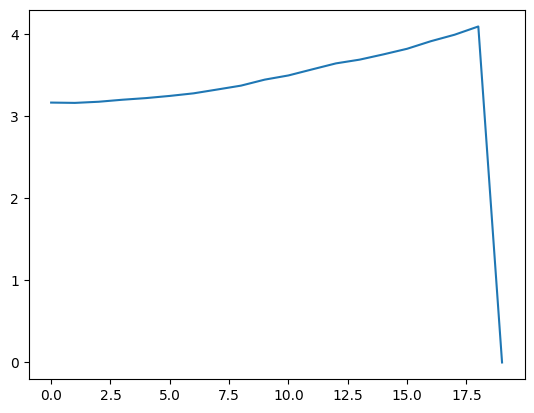

In [27]:
plt.plot(avg_distances)

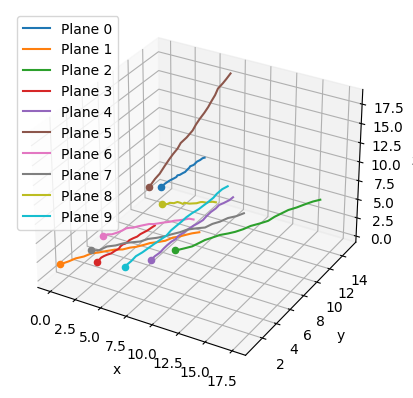

In [28]:
#Setup 3d plotting (not sure if this is best way of doing it)
ax = plt.figure().add_subplot(projection='3d')

for plane in planes:
    pos = plane.pos_array
    #For each plane plots line of trajectory
    ax.plot(pos[:,0],pos[:,1],pos[:,2],label="Plane {id}".format(id = plane.id))
    #Dot for start pos
    ax.scatter(pos[0,0],pos[0,1],pos[0,2])

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")

#Bounding plot to grid size set
#NOTE: planes might disappear off edge
# ax.set_xlim(0,grid_size)
# ax.set_ylim(0,grid_size)
# ax.set_zlim(0,grid_size)

ax.legend()
plt.show()